##### CSCI 303
# Introduction to Data Science
<p/>
### 7 - Machine Learning Beginnings (2)

![Bias-variance tradeoff](bias-variance.png) 

## This Lecture
---
- Some more basic supervised learning concepts
- Some more Python

## From Last Time
---
Recall from last time, we generated noisy data samples from this function:

$$ f(x) = 3 + 0.5 n - n^2 + 0.15 n^3 $$


Before we go any further, let's introduce Python *functions* to make our life a bit easier.

Here's $f(x)$ as a Python function:

In [1]:
def f(x):
    return 3 + 0.5 * x - x**2 + 0.15 * x**3

Python functions have very flexible parameter lists and are first class objects, making them very powerful and useful.  We'll explore these concepts as they become relevant.

Now we can compute $f(x)$ and plot it using:

In [2]:
import numpy as np
import matplotlib.pyplot as plt  

X = np.arange(-5, 5, 0.1)
Y = f(X)

plt.plot(X, Y)
plt.show()

<Figure size 640x480 with 1 Axes>

We also want $n$ sample points:

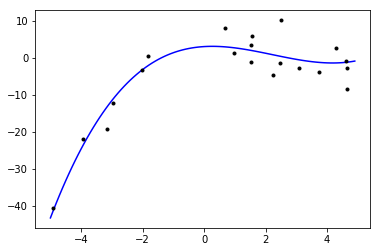

In [3]:
n = 20

np.random.seed(12345)  # just for repeatability of this lecture

def sample(n, fn, limits, noise=1):
    width = limits[1] - limits[0]
    x = np.random.random(n) * width + limits[0]
    y = fn(x) + np.random.randn(n) * noise
    return x, y

# note we can pass in f as an object, and use it in sample!
trainX, trainY = sample(n, f, [-5, 5], 3)

plt.plot(X, Y, 'b-', trainX, trainY, 'k.')
plt.show()

Our approximation model using linear regression looks like:
$$\begin{align}
    \hat f(\mathbf{x}) & = 1 w_0 + x_1 w_1 + ... + x_k w_k \\
                   & = \phi \cdot \mathbf{w}
  \end{align}$$
  
where $\phi$ is a vector of *features* of the input X.

Our input is simple: just an x coordinate.

So we generated some richer features using powers of X.

For flexibility, let's implement $\phi$ as a function of X, with a parameter that lets us tune the model complexity:

In [19]:
def phi(x, k):
    return np.array([x ** p for p in range(k+1)]).T

Phi = phi(trainX, 5)
Phi
# trainX.shape
# Phi
# trainX

array([[ 1.00000000e+00,  4.29616093e+00,  1.84569987e+01,
         7.92942368e+01,  3.40660802e+02,  1.46353363e+03],
       [ 1.00000000e+00, -1.83624445e+00,  3.37179370e+00,
        -6.19143747e+00,  1.13689927e+01, -2.08762498e+01],
       [ 1.00000000e+00, -3.16081188e+00,  9.99073176e+00,
        -3.15788237e+01,  9.98147211e+01, -3.15495557e+02],
       [ 1.00000000e+00, -2.95439721e+00,  8.72846290e+00,
        -2.57873465e+01,  7.61860646e+01, -2.25083897e+02],
       [ 1.00000000e+00,  6.77250291e-01,  4.58667956e-01,
         3.10633007e-01,  2.10376294e-01,  1.42477406e-01],
       [ 1.00000000e+00,  9.55447030e-01,  9.12879027e-01,
         8.72207555e-01,  8.33348117e-01,  7.96219984e-01],
       [ 1.00000000e+00,  4.64514520e+00,  2.15773739e+01,
         1.00230035e+02,  4.65583065e+02,  2.16270094e+03],
       [ 1.00000000e+00,  1.53177097e+00,  2.34632230e+00,
         3.59402838e+00,  5.50522834e+00,  8.43274894e+00],
       [ 1.00000000e+00,  2.48906638e+00,  6.195

And then we learned a function approximation using using OLS regression:

$$ \mathbf{w} = (\Phi^T \Phi)^{-1} \Phi^T \mathbf{y} $$

In [5]:
def lsq(A, b):
    return np.linalg.inv(A.T @ A) @ A.T @ b

w = lsq(Phi, trainY)

Plotting our learned function in the range [-5, 5]:

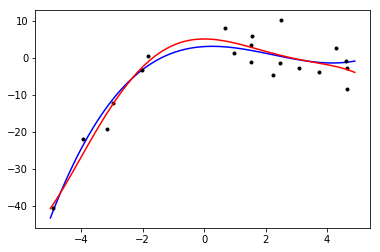

In [6]:
Yhat = phi(X, 5) @ w
plt.plot(X, Y, 'b-', trainX, trainY, 'k.', X, Yhat, 'r-')
plt.show()

## Error Measures
---
The above picture is nice, but what does it actually tell us about the quality of our approximation?

How can we tell if a different model actually is a better "fit"?

We need a *measure* of the quality of the fit to usefully compare different models.

## MSE and RMSE
---
Mean Squared Error (MSE) is the variance of our data with respect to our approximation:

$$ MSE = \frac{1}{n} \sum_{i = 1}^n (y_i - \hat f(x_i))^2 $$

RMSE is just the square root of the MSE (cf. standard deviation)

Doing the math, we can see that MSE and RMSE for our fit are:

In [7]:
import math

diff = trainY - (Phi @ w)

MSE = (diff ** 2).sum() / n
RMSE = math.sqrt(MSE)

print("MSE:  ", MSE)
print("RMSE: ", RMSE)

MSE:   13.929701261940613
RMSE:  3.732251500360153


## Interpreting (R)MSE
---
What is our error measure telling us?

- Roughly, the error we expect to have on any training point

Is this useful?  Why or why not?

## Model Comparison
---
Can we reduce RMSE with more features?

Yes:

In [8]:
# train a model with powers of x up to x**10
Phi10 = phi(trainX, 10)
w10 = lsq(Phi10, trainY)

# make RMSE calc into a function for easier use
def rmse(y, yhat):
    return math.sqrt(((yhat - y) ** 2).sum() / len(y))

# measure RMSE
RMSE10 = rmse(trainY, Phi10 @ w10)

print("RMSE (order 5): ", RMSE)
print("RMSE (order 10):", RMSE10)

RMSE (order 5):  3.732251500360153
RMSE (order 10): 3.100020280370342


Let's visualize this clearly improved approximation:

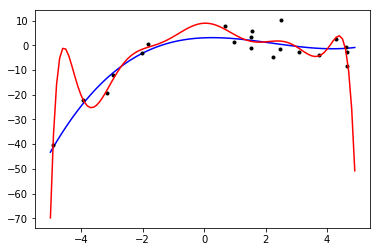

In [9]:
Yhat10 = phi(X, 10) @ w10
plt.plot(X, Y, 'b-', trainX, trainY, 'k.', X, Yhat10, 'r-')
plt.show()

Hm.

## Training vs Testing
---
Above we computed the *training* error:

- Tells us about our approximation power
- Doesn't really tell us about prediction quality!

We need a way to test performance on previously unseen data!

- Typically hold out some data points as a *test set*
- Measure RMSE on test set to compare models

In [10]:
# draw test samples from same function/noise 
# distribution as training data
testX, testY = sample(20, f, [-5, 5], 3)

# compute RMSEs on test data
testPhi = phi(testX, 5)
testPhi10 = phi(testX, 10)

testRMSE = rmse(testY, testPhi @ w)
testRMSE10 = rmse(testY, testPhi10 @ w10)

print("test RMSE (order 5): ", testRMSE)
print("test RMSE (order 10):", testRMSE10)

test RMSE (order 5):  3.260989631346084
test RMSE (order 10): 4.8727899237914505


## Overfitting (and Underfitting)
---
The above example demonstrates a classic supervised learning problem known as *overfitting*.

Overfitting is also known as "fitting the noise".

Essentially, we can push down training error indefinitely simply by cranking up model complexity.

However, *test* error starts increasing at some point.  We can plot this trend:

In [11]:
trainRMSE = []
testRMSE = []
orders = range(1, 13)

for p in orders:
    w = lsq(phi(trainX, p), trainY)
    trainRMSE.append(rmse(trainY, phi(trainX, p) @ w))
    testRMSE.append(rmse(testY, phi(testX, p) @ w))


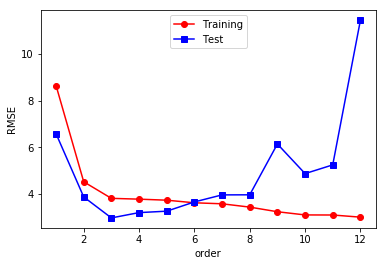

In [12]:
plt.plot(orders, trainRMSE, 'r-o', orders, testRMSE, 'b-s')
plt.xlabel('order')
plt.ylabel('RMSE')
plt.legend(['Training', 'Test'], loc="upper center")
plt.show()

The U-shaped blue curve is a pretty classic illustration of overfitting.

This is sometimes called a "bathtub" plot due to the shape.

We can also visualize each of the fits, if desired:

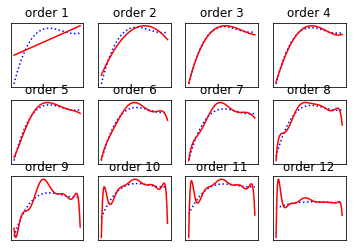

In [13]:
for p in orders:
    w = lsq(phi(trainX, p), trainY)
    Yhat = phi(X, p) @ w
    plt.subplot(3, 4, p)
    plt.plot(X, Y, 'b:', X, Yhat, 'r-')
    plt.xticks([]); plt.yticks([])
    plt.title('order ' + str(p))
plt.show()

Later we'll explore techniques for finding the "best fit" model.

## Bias and Variance
---
Mathematically, the *expected MSE* for a test input $x$ can be decomposed into three sources of error:

- The **variance** of $\hat f(x)$
- The **squared bias** of $\hat f(x)$
- The variance of the noise $\epsilon$

The expectation here is taken over training sets.

Note that $var(\epsilon)$ is irreducible; thus it is a lower bound on MSE.

## Bias-Variance Tradeoff
---
To minimize MSE, then, we want to simultaneously minimize bias and variance.

What are these terms?

First, **variance** of $\hat f(x)$ is the variation in $\hat f(x)$ over different training sets.

It is a measure of the stability, in some sense, of the model.  Small changes to the training set should result in only small changes in the approximation.

Consider a couple of models on our problem above: an order 1 model, and an order 6 model, trained on two different training sets:

In [14]:
trainX2, trainY2 = sample(n, f, [-5, 5], 3)
Yhat1_1 = phi(X, 1) @ lsq(phi(trainX, 1), trainY)
Yhat1_6 = phi(X, 6) @ lsq(phi(trainX, 6), trainY)
Yhat2_1 = phi(X, 1) @ lsq(phi(trainX2, 1), trainY2)
Yhat2_6 = phi(X, 6) @ lsq(phi(trainX2, 6), trainY2)

Plotting the results against each other, we see:

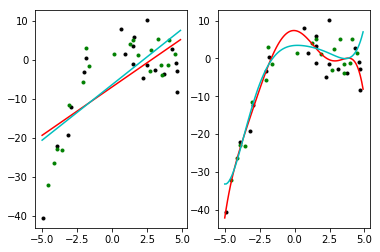

In [15]:
plt.subplot(1,2,1); plt.plot(trainX, trainY, 'k.', trainX2, trainY2, 'g.', X, Yhat1_1, 'r-', X, Yhat2_1, 'c-')
plt.subplot(1,2,2); plt.plot(trainX, trainY, 'k.', trainX2, trainY2, 'g.', X, Yhat1_6, 'r-', X, Yhat2_6, 'c-')
plt.show()

The variance of the order 1 model is clearly much smaller than the variance of the order 6 model.

Second, **bias** of $\hat f(x)$ measures the error introduced by the model.

Roughly speaking, bias measures the difference between the absolute best fit your model can make and the true $f(x)$.

Put another way, if you had unlimited training data, which model would give the best result?

In the diagrams above, it is clear that the order 1 (linear) model is too simple; it has a large bias.

The order 6 model, on the other hand, clearly has the representational power to reflect the real story; it has small bias.

The tradeoff, then, is the source of our "bathtub" plot.

As model complexity increases, we reduce bias, but we increase variance.

- Variance is affected by size of training data and noise
- Small training data (relative to noise) is the common case

Going the other way, we reduce variance, but increase bias.



The following plot is *very* notional:

- Estimating bias via lots of training data (for orders < 3)
- Estimating variance via many trials
- Variance of $\epsilon$ known from our experimental setup

In [16]:
X = np.arange(-5, 5, 0.1)
Y = f(X)

btX, btY = sample(1000, f, [-5, 5], 3)
bias = [0] * 6
for i, p in enumerate([1,2]):
    btw = lsq(phi(btX, p), btY)
    bias[i] = rmse(Y, phi(X, p) @ btw) ** 2

n = 20
tsets = { 'x': [], 'y': []}
for i in range(50):
    tX, tY = sample(n, f, [-5, 5], 3)
    tsets['x'].append(tX)
    tsets['y'].append(tY)

variance = [0] * 6
orders = range(1,7)
for i, p in enumerate(orders):
    yhats = []
    for j in range(50):
        w = lsq(phi(tsets['x'][j], p), tsets['y'][j])
        yhats.append(phi(X, p) @ w)
    variance[i] = (np.var(np.array(yhats), axis=0)).mean()

MSE = np.array(bias) + np.array(variance) + 9

Text(0.5,0,'order')

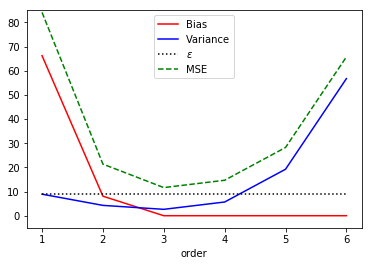

In [17]:
plt.plot(orders, bias, 'r-', orders, variance, 'b-', orders, [9]*6, 'k:', orders, MSE, 'g--')
plt.ylim([-5, 85])
plt.legend(['Bias', 'Variance', '$\epsilon$', 'MSE'], loc = 'upper center')
plt.xlabel('order')

In [18]:
plt.show()